### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

### Reading data

In [2]:
data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-22,291.913330,292.399994,286.296661,289.913330,289.913330,55843200
1,2022-08-23,291.453339,298.826660,287.923340,296.453339,296.453339,63984900
2,2022-08-24,297.563324,303.646667,296.500000,297.096680,297.096680,57259800
3,2022-08-25,302.359985,302.959991,291.600006,296.070007,296.070007,53230000
4,2022-08-26,297.429993,302.000000,287.470001,288.089996,288.089996,57163900


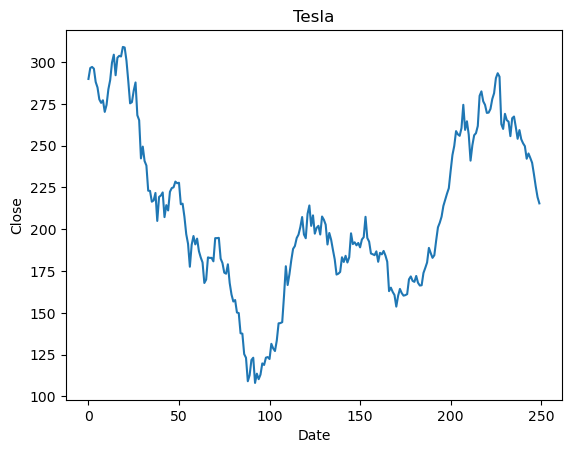

In [3]:
#visualize close column
close = data["Close"]
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

### Create a new DataFrame with only Date and Close columns:

In [4]:
data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format=True)
data = data[['Date','Close']]

/tmp/ipykernel_59451/1324831777.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format=True)


In [7]:
data = data.rename(columns={"Date":"ds","Close":"y"})

### Predict the data

In [8]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

16:59:57 - cmdstanpy - INFO - Chain [1] start processing
16:59:57 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
610,2024-08-13,519.641902,374.876263,661.537600
611,2024-08-14,520.602902,376.396071,664.051653
612,2024-08-15,520.540823,374.314010,666.545001
613,2024-08-16,521.629921,374.172126,668.316267
614,2024-08-17,515.490536,366.964994,660.585226


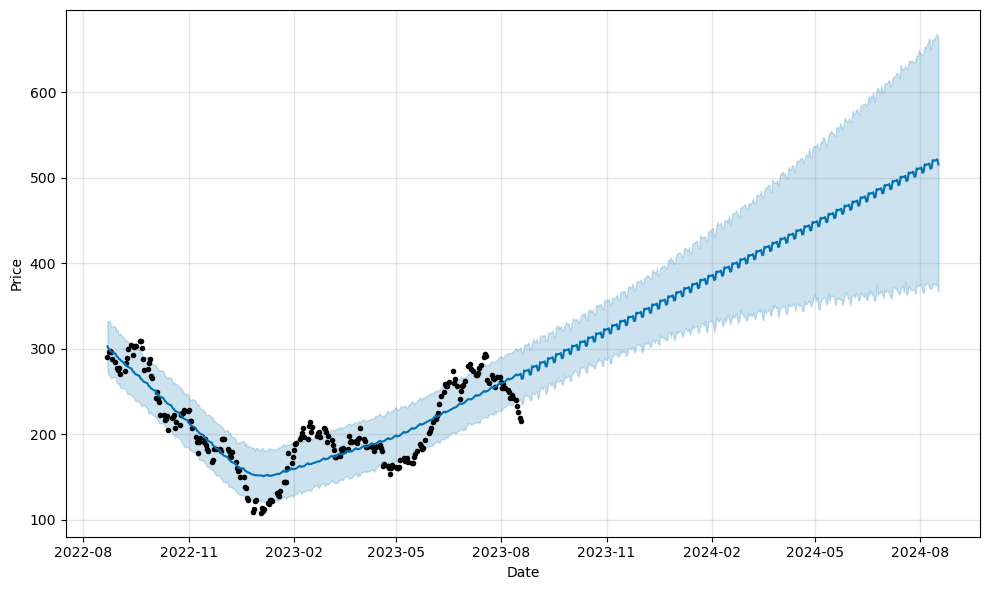

In [9]:
graph = model.plot(forcast,xlabel="Date", ylabel="Price")